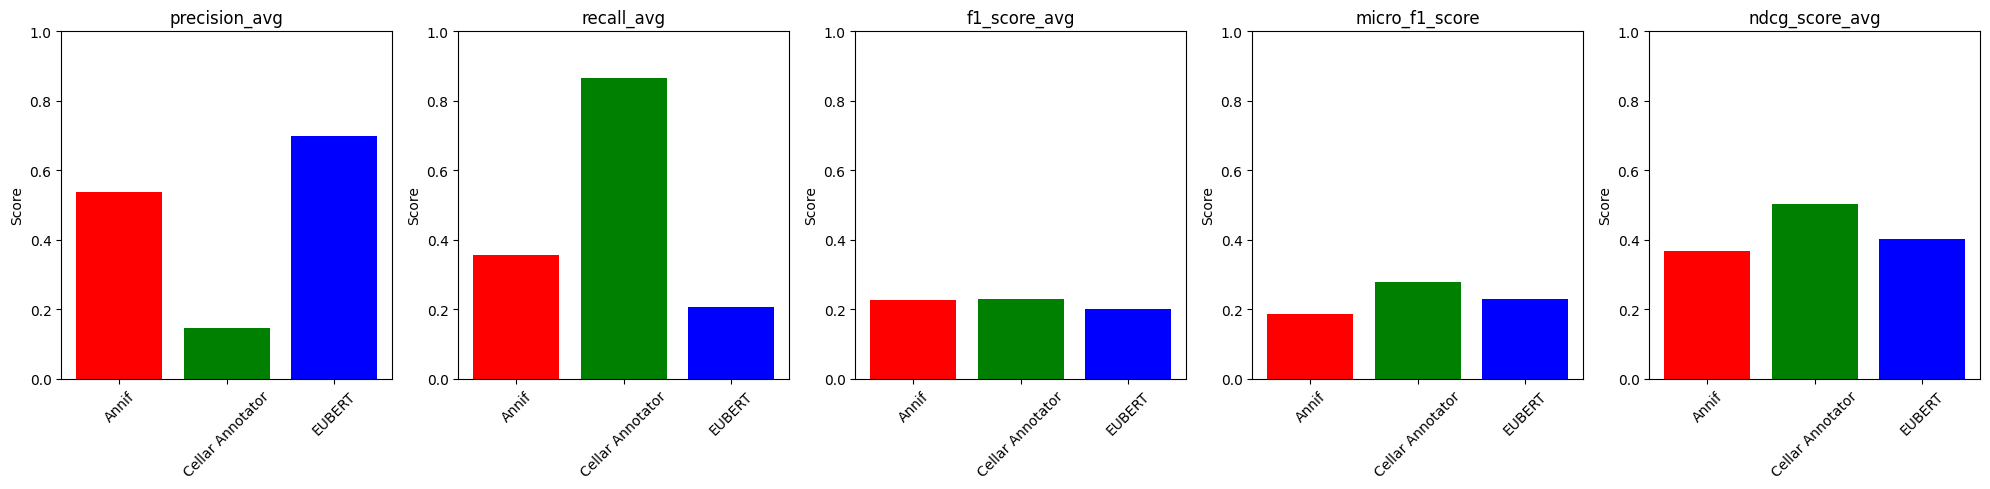

In [4]:
import matplotlib.pyplot as plt
import json

# Paths to the files containing results
files = {
    "Annif": "output/annif_results.json",
    "Cellar Annotator": "output/cellar_annotator_results.json",
    "EUBERT": "output/eubert_results.json"
}

# Function to load data from JSON file
def load_data(filepath):
    with open(filepath, 'r') as file:
        return json.load(file)

# Load results from each file
results = {system: load_data(path) for system, path in files.items()}

# Metrics to plot
metrics = ["precision_avg", "recall_avg", "f1_score_avg", "micro_f1_score", "ndcg_score_avg"]

# Create figure and axes
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

# Plotting each metric
for i, metric in enumerate(metrics):
    systems = list(results.keys())
    values = [result[metric] for result in results.values()]
    axes[i].bar(systems, values, color=['red', 'green', 'blue'])
    axes[i].set_title(metric)
    axes[i].set_ylim(0, 1)  # Ensure the y-axis is the same for all plots for easy comparison
    axes[i].set_ylabel('Score')
    axes[i].set_xticks(range(len(systems)))  # Set tick positions explicitly
    axes[i].set_xticklabels(systems, rotation=45)  # Set tick labels with explicit positions

# Adjust layout
plt.tight_layout()
plt.show()


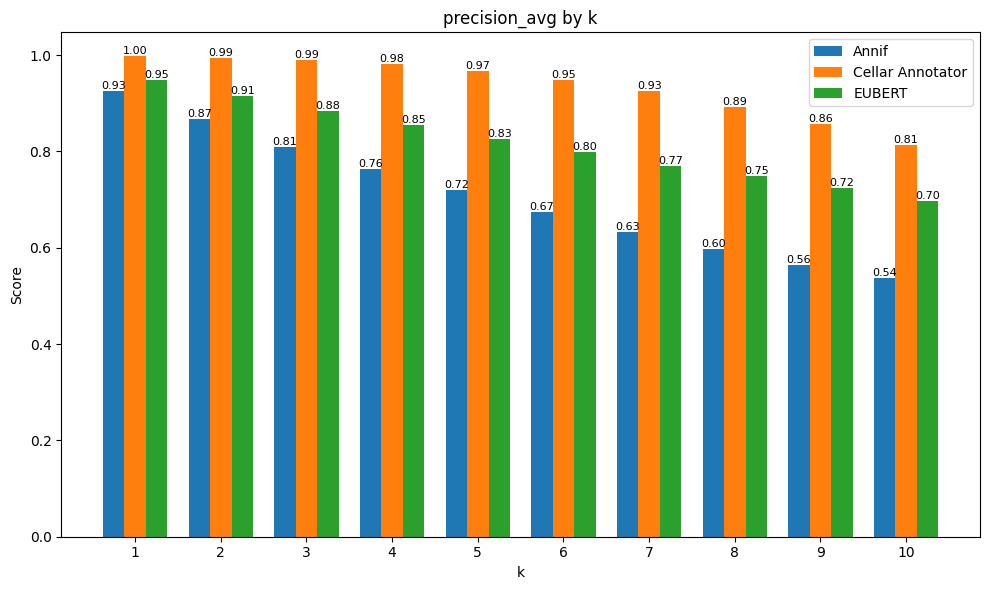

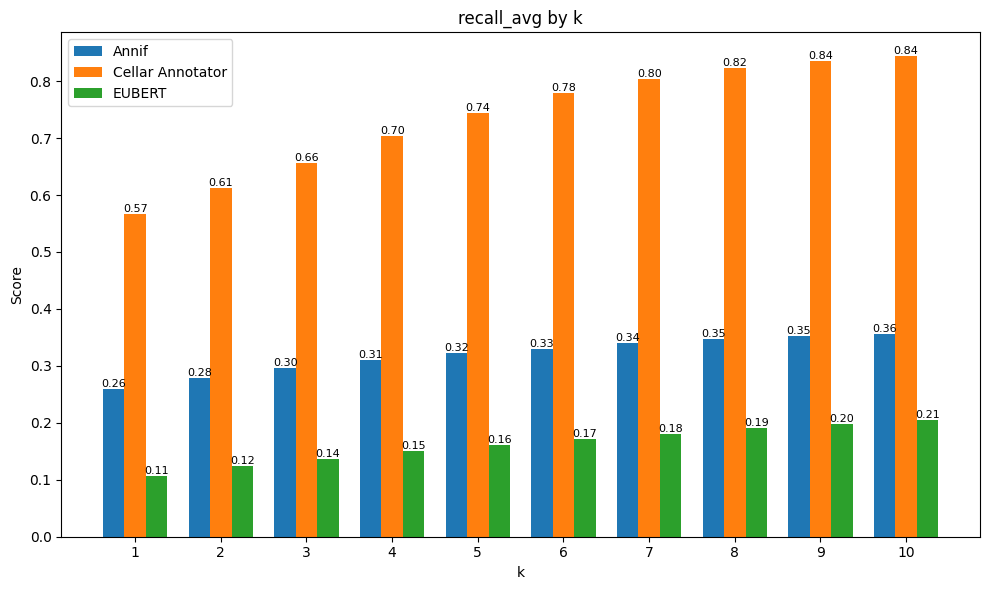

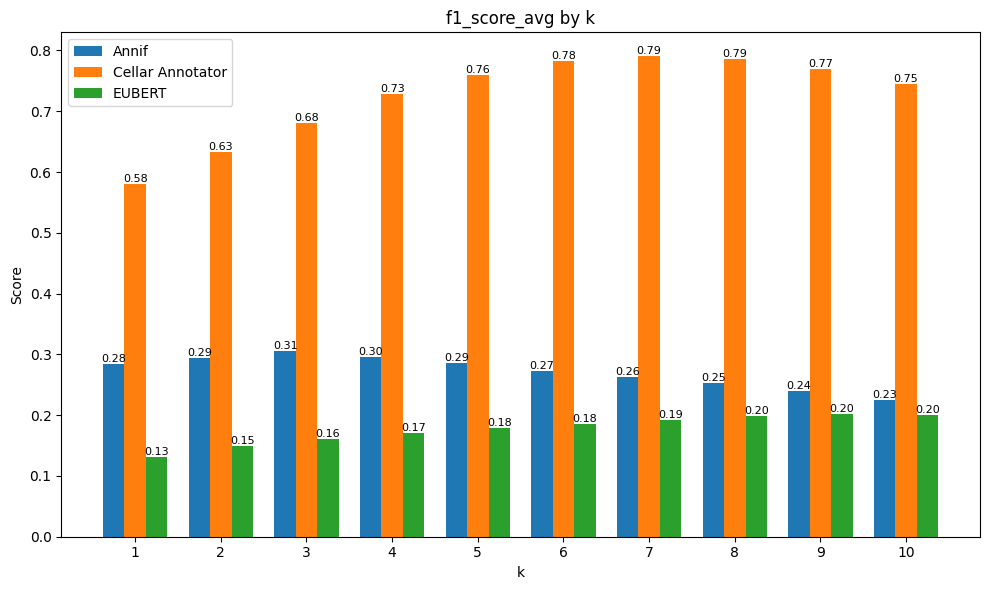

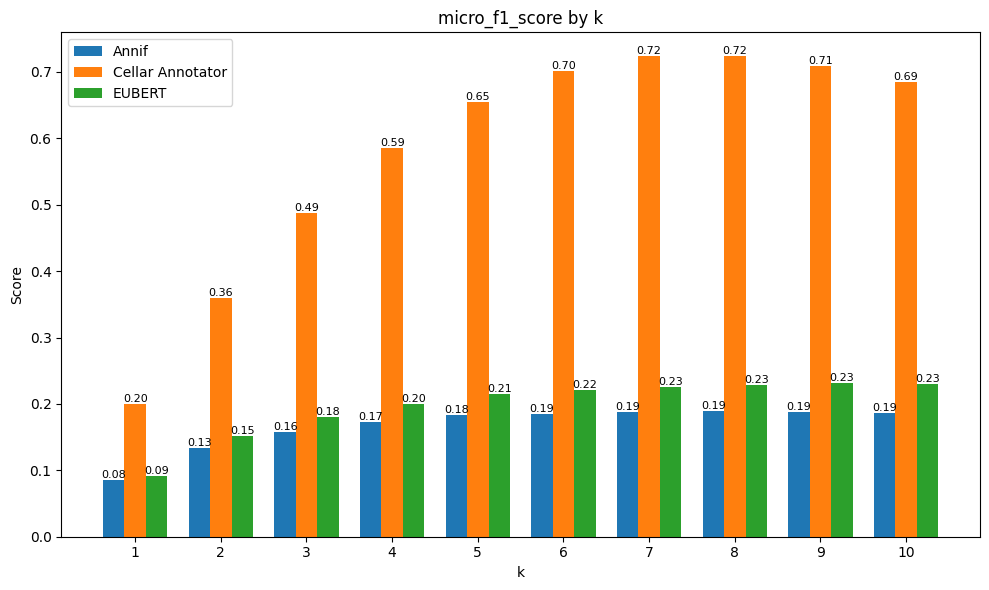

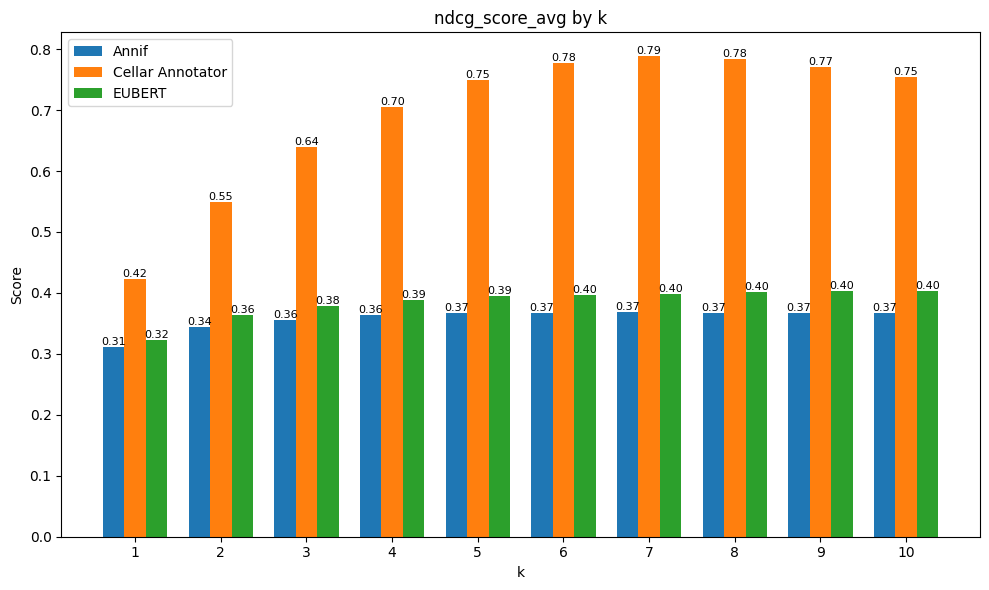

In [8]:
import matplotlib.pyplot as plt
import json
import numpy as np

# Paths to the files containing results
files = {
    "Annif": "output/annif_k_results.json",
    "Cellar Annotator": "output/cellar_annotator_k_results.json",
    "EUBERT": "output/eubert_k_results.json"
}

# Function to load data from JSON file
def load_data(filepath):
    with open(filepath, 'r') as file:
        return json.load(file)

# Load results from each file
results = {system: load_data(path) for system, path in files.items()}

# Metrics to plot
metrics = ["precision_avg", "recall_avg", "f1_score_avg", "micro_f1_score", "ndcg_score_avg"]

# Define the width of the bars
bar_width = 0.25

# Create a separate plot for each metric
for metric in metrics:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Determine the sorted k values
    k_positions = sorted({int(k) for data in results.values() for k in data.keys()})
    
    # Offset for grouped bar placement
    offset = -bar_width*(len(results) - 1)/2

    for system, data in results.items():
        k_values = sorted(data.keys(), key=int)  # Sorted k values
        metric_values = [data[k][metric] for k in k_values]  # Metric values for each k
        x_positions = [k + offset for k in np.arange(len(k_values))]  # Adjusted positions for the bars
        bars = ax.bar(x_positions, metric_values, width=bar_width, label=system)
        offset += bar_width
        
        # Adding text labels above bars
        for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=8)

    # Setting plot details
    ax.set_xticks(range(len(k_values)))
    ax.set_xticklabels(k_values)
    ax.set_title(f'{metric} by k')
    ax.set_xlabel('k')
    ax.set_ylabel('Score')
    ax.legend()

    # Show plot
    plt.tight_layout()
    plt.show()
